In [ ]:
#!pip install umap-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.3 MB/s 
     |████████████████████████████████| 1.1 MB 15.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=18d6a21602fbc869cdc0a087d7f1a28b0d7b278ea669befad36a46649cf3b8df
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=3d905f8b82f1f0136c6f9dd00cfce3756c49dcc77ebd11f8e1e015a099023a68
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
#!pip install faiss-cpu
#!pip install faiss-gpu
#!pip install -U sentence-transformers
#!pip install -U giotto-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.0 MB 7.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85.5 MB 36 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.8 MB/s 
     |████████████████████████████████| 5.8 MB 38.7 MB/s 
     |████████████████████████████████| 1.3 MB 33.8 MB/s 
     |████████████████████████████████| 182 kB 15.5 MB/s 
     |████████████████████████████████| 7.6 MB 40.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=ae99a9811d1f0a2a7698ca250596b013a8f5143ecc9ff7774a3854518ffcf6e7
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully

In [ ]:
#used documentations from https://giotto-ai.github.io/gtda-docs/latest/modules/generated/time_series/embedding/gtda.time_series.TakensEmbedding.html?highlight=interpret
#official tutorial: https://giotto-ai.github.io/gtda-docs/0.5.1/notebooks/gravitational_waves_detection.html

In [ ]:
import numpy as np
import torch
import umap
import pandas as pd
import faiss
import time
from sentence_transformers import SentenceTransformer

## Speech from Shakespeare's Julius Caesar, we took time to manually disambiguate pronouns before feeding to the SBERT

In [ ]:
speech=["Friends, Romans, countrymen, lend me your ears;",
"I come to bury Caesar, not to praise him.",
"The evil that men do lives after them;",
"The good is oft interred with their bones;",
"So let it be with Caesar. The noble Brutus",
"Hath told you Caesar was ambitious:",
"If it were so, it was a grievous fault,",
"And grievously hath Caesar answer’d it.",
"Here, under leave of Brutus and the rest–",
"For Brutus is an honourable man;",
"So are they all, all honourable men–",
"Come I to speak in Caesar’s funeral.",
"He was my friend, faithful and just to me:",
"But Brutus says he was ambitious;",
"And Brutus is an honourable man.",
"He hath brought many captives home to Rome",
"Whose ransoms did the general coffers fill:",
"Did this in Caesar seem ambitious?",
"When that the poor have cried, Caesar hath wept:",
"Ambition should be made of sterner stuff:",
"Yet Brutus says he was ambitious;",
"And Brutus is an honourable man.",
"You all did see that on the Lupercal",
"I thrice presented him a kingly crown,",
"Which he did thrice refuse: was this ambition?",
"Yet Brutus says he was ambitious;",
"And, sure, he is an honourable man.",
"I speak not to disprove what Brutus spoke,",
"But here I am to speak what I do know.",
"You all did love him once, not without cause:",
"What cause withholds you then, to mourn for him?",
"O judgment! thou art fled to brutish beasts,",
"And men have lost their reason. Bear with me;",
"My heart is in the coffin there with Caesar,",
"And I must pause till it come back to me."]

data=["Friends, Romans, countrymen, lend me your ears;",
"I come to bury Caesar, not to praise Caesar.",
"The evil that men do lives after them;",
"The good is oft interred with their bones;",
"So let it be with Caesar. The noble Brutus",
"Hath told you Caesar was ambitious:",
"If it were so, it was a grievous fault,",
"And grievously hath Caesar answer’d it.",
"Here, under leave of Brutus and the rest–",
"For Brutus is an honourable man;",
"So are they all, all honourable men–",
"Come I to speak in Caesar’s funeral.",
"Caesar was my friend, faithful and just to me:",
"But Brutus says Caesar was ambitious;",
"And Brutus is an honourable man.",
"Caesar hath brought many captives home to Rome",
"Whose ransoms did the general coffers fill:",
"Did this in Caesar seem ambitious?",
"When that the poor have cried, Caesar hath wept:",
"Ambition should be made of sterner stuff:",
"Yet Brutus says he was ambitious;",
"And Brutus is an honourable man.",
"You all did see that on the Lupercal",
"I thrice presented Caesar a kingly crown,",
"Which Caesar did thrice refuse: was this ambition?",
"Yet Brutus says Caesar was ambitious;",
"And, sure, Brutus is an honourable man.",
"I speak not to disprove what Brutus spoke,",
"But here I am to speak what I do know.",
"You all did love Caesar once, not without cause:",
"What cause withholds you then, to mourn for Caesar?",
"O judgment! thou art fled to brutish beasts,",
"And men have lost their reason. Bear with me;",
"My heart is in the coffin there with Caesar,",
"And I must pause till it come back to me."]


model = SentenceTransformer('distilbert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
anthony=model.encode(data)
mapping=umap.UMAP()
anthony_umap=mapping.fit_transform(anthony)

## Dimensionality reduction from Sbert embedding to 2d with UMAP, (an algorithm similar to t-SNE, that reserves distance information between points)

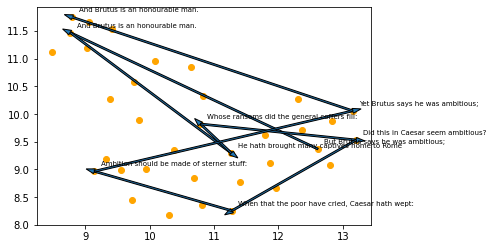

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(anthony_umap[:,0], anthony_umap[:,1],color="orange")
for i in np.arange(9)+13:
    plt.text(anthony_umap[i,0]+0.1,anthony_umap[i,1]+0.1, speech[i],fontsize=7) 
for i in np.arange(8)+13:
    plt.arrow(anthony_umap[i,0],anthony_umap[i,1],anthony_umap[i+1,0]-anthony_umap[i,0],anthony_umap[i+1,1]-anthony_umap[i,1],width=0.03)
plt.show()

## Dimensionality reduction of SBERT output to 2D by isomap, an algorithm that preserves distance between points through a network that only connects each point with its few closest neighbors (in this case 2)

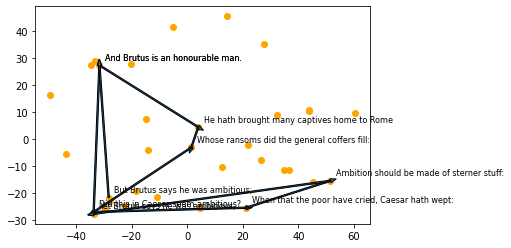

In [ ]:
from sklearn.manifold import Isomap
isomap=Isomap(n_neighbors=2) #1,2
anthony_isomap=isomap.fit_transform(anthony)

plt.scatter(anthony_isomap[:,0], anthony_isomap[:,1],color="orange")
for i in np.arange(9)+13:
    plt.text(anthony_isomap[i,0]+2, anthony_isomap[i,1]+2, speech[i],fontsize=8) 
for i in np.arange(8)+13:
    plt.arrow(anthony_isomap[i,0],anthony_isomap[i,1],anthony_isomap[i+1,0]-anthony_isomap[i,0],anthony_isomap[i+1,1]-anthony_isomap[i,1],width=0.5)
plt.show()

### Both instances has clear differentiation among the verses that ponders if Caesar was ambitious, Brutus is honorable, and evidences that Caesar was not ambitious

### Same process with the national anthem, questions if the flag is still standing, suspense building, and circles back to the fact that the flag is still waving

In [ ]:
anthem=["O say can you see, by the dawn's early light,",
"What so proudly we hailed at the twilight's last gleaming,",
"Whose broad stripes and bright stars through the perilous fight,",
"O'er the ramparts we watched, were so gallantly streaming?",
"And the rocket's red glare, the bombs bursting in air,",
"Gave proof through the night that our flag was still there;",
"O say does that star-spangled banner yet wave",
"O'er the land of the free and the home of the brave?",

"On the shore dimly seen through the mists of the deep,",
"Where the foe's haughty host in dread silence reposes,",
"What is that which the breeze, o'er the towering steep,",
"As it fitfully blows, half conceals, half discloses?",
"Now it catches the gleam of the morning's first beam,",
"In full glory reflected now shines in the stream:",
"'Tis the star-spangled banner, O long may it wave",
"O'er the land of the free and the home of the brave."]

In [ ]:
anthem_encoded=model.encode(anthem)
anthem_umap=mapping.fit_transform(anthem_encoded)

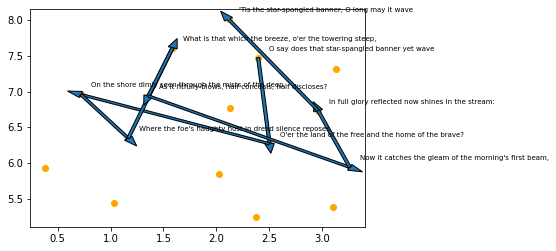

In [ ]:
plt.scatter(anthem_umap[:,0], anthem_umap[:,1],color="orange")
for i in np.arange(9)+6:
    plt.text(anthem_umap[i,0]+0.1,anthem_umap[i,1]+0.1, anthem[i],fontsize=7) 
for i in np.arange(8)+6:
    plt.arrow(anthem_umap[i,0],anthem_umap[i,1],anthem_umap[i+1,0]-anthem_umap[i,0],anthem_umap[i+1,1]-anthem_umap[i,1],width=0.03)
plt.show()

In [ ]:
isomap=Isomap(n_neighbors=2)
anthem_isomap=isomap.fit_transform(anthem_encoded)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


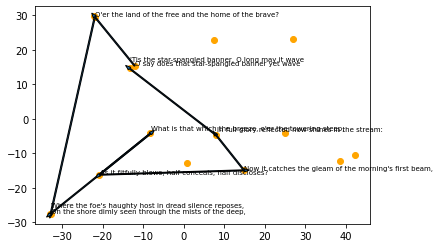

In [ ]:
space=[0,0,0,2,1,0,0,1,2,2,0]
plt.scatter(anthem_isomap[:,0], anthem_isomap[:,1],color="orange")

for i in np.arange(9)+6:
    plt.text(anthem_isomap[i,0]+0.1,anthem_isomap[i,1]+0.1+space[i-6], anthem[i],fontsize=7) 
for i in np.arange(8)+6:
    plt.arrow(anthem_isomap[i,0],anthem_isomap[i,1],anthem_isomap[i+1,0]-anthem_isomap[i,0],anthem_isomap[i+1,1]-anthem_isomap[i,1],width=0.3)
plt.show()

In [ ]:
anthony_word=[]
for dd in data:
    anthony_word.append(dd.replace(",","").replace(";","").replace("?","").replace(".","").replace("’s","").replace("'","").replace(":","").replace("–","").replace("’d","ed").replace("!","").split(" "))
anthem_word=[]
for dd in anthem:
    anthem_word.append(dd.replace(",","").replace(";","").replace("?","").replace(".","").replace("’s","").replace("'","").replace(":","").replace("-","").replace("’d","ed").replace("!","").split(" "))
#fg=[ for dd in data]

## Include "above" in report, "below" are explorations of giotto on single sentences and data wrangling for article representations, 


Transforming both texts into wordvectors

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

wvec_anthony=[]#np.array([])
for i in range(len(data)):
    wvec_anthony.append([list(tt.vector) for tt in nlp(data[i])][0:7])

wvec_anthem=[]
for i in range(len(anthem)):
    wvec_anthem.append(np.array([list(tt.vector) for tt in nlp(anthem[i])])[0:10]) #has to deal with uneven sentence length

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
np.array(wvec_anthony).shape
from sklearn.decomposition import PCA
wwvec=np.array(wvec_anthony).reshape(-1,96)
wwvec.shape

mapping= PCA(n_components=7)
anthony_vec_umap=mapping.fit_transform(wwvec)

In [ ]:
from gtda.homology import VietorisRipsPersistence, WeightedRipsPersistence
from gtda.diagrams import PersistenceEntropy

VR = VietorisRipsPersistence(homology_dimensions=[0,1])  
diagrams = VR.fit_transform(anthony_vec_umap.reshape(35,7,-1))
print(diagrams.shape)



PE = PersistenceEntropy()
features = PE.fit_transform(diagrams)

(35, 8, 3)


/usr/local/lib/python3.8/dist-packages/gtda/homology/simplicial.py:232: DataDimensionalityWarning: Input array X has X.shape[1] == X.shape[2]. This is consistent with a collection of distance/adjacency matrices, but the input is being treated as a collection of vectors in Euclidean space.
  check_point_clouds(X, accept_sparse=True,
/usr/local/lib/python3.8/dist-packages/gtda/homology/simplicial.py:299: DataDimensionalityWarning: Input array X has X.shape[1] == X.shape[2]. This is consistent with a collection of distance/adjacency matrices, but the input is being treated as a collection of vectors in Euclidean space.
  X = check_point_clouds(X, accept_sparse=True,


In [ ]:
features

array([[ 2.27570049,  0.        ],
       [ 2.52429243, -1.        ],
       [ 2.55946178, -1.        ],
       [ 2.56722239,  0.        ],
       [ 2.47729077, -1.        ],
       [ 2.43231808, -1.        ],
       [ 2.43014129, -1.        ],
       [ 2.47649187, -1.        ],
       [ 2.57492262, -1.        ],
       [ 2.55172997, -1.        ],
       [ 2.53986855, -1.        ],
       [ 2.51958351,  0.        ],
       [ 2.50970684, -1.        ],
       [ 2.44740882,  0.        ],
       [ 2.54649335, -1.        ],
       [ 2.53819765,  0.        ],
       [ 2.51889154,  0.        ],
       [ 2.53806214, -1.        ],
       [ 2.57592191, -1.        ],
       [ 2.56676879,  0.        ],
       [ 2.49279802,  0.81319061],
       [ 2.54649335, -1.        ],
       [ 2.53316343,  0.        ],
       [ 2.56671069, -1.        ],
       [ 2.47863958, -1.        ],
       [ 2.44716689, -1.        ],
       [ 2.42986247, -1.        ],
       [ 2.52573959,  0.        ],
       [ 2.53898619,

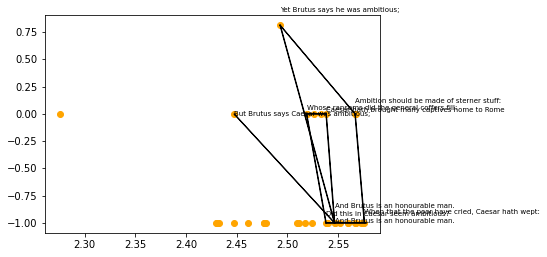

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(features[:,0], features[:,1],color="orange")

for i in np.arange(9)+13:
    plt.text(features[i,0],features[i,1]+0.02*(i-9)-0.1, data[i],fontsize=7) 
for i in np.arange(8)+13:
    plt.arrow(features[i,0],features[i,1],features[i+1,0]-features[i,0],features[i+1,1]-features[i,1],width=0.0005)
    

plt.show()

In [ ]:
data[13:22]

['But Brutus says Caesar was ambitious;',
 'And Brutus is an honourable man.',
 'Caesar hath brought many captives home to Rome',
 'Whose ransoms did the general coffers fill:',
 'Did this in Caesar seem ambitious?',
 'When that the poor have cried, Caesar hath wept:',
 'Ambition should be made of sterner stuff:',
 'Yet Brutus says he was ambitious;',
 'And Brutus is an honourable man.']

In [ ]:
wwvec=np.array(wvec_anthony).reshape(-1,96)
wwvec.shape

mapping= PCA(n_components=12)
anthony_vec_umap=mapping.fit_transform(wwvec)

VR = VietorisRipsPersistence(homology_dimensions=[0,1])  
diagrams = VR.fit_transform(np.array(wvec_anthony))
print(diagrams.shape)






PE = PersistenceEntropy()
features = PE.fit_transform(diagrams)

(35, 8, 3)


In [ ]:
features

array([[ 2.53861584, -1.        ],
       [ 2.57646527, -1.        ],
       [ 2.58219339, -1.        ],
       [ 2.58211209, -1.        ],
       [ 2.57144644, -1.        ],
       [ 2.56572343, -1.        ],
       [ 2.52094294, -1.        ],
       [ 2.5733757 , -1.        ],
       [ 2.58208012, -1.        ],
       [ 2.58235454, -1.        ],
       [ 2.58050383,  0.        ],
       [ 2.57172418, -1.        ],
       [ 2.57961025,  0.        ],
       [ 2.57758912,  0.        ],
       [ 2.58112967, -1.        ],
       [ 2.58462793,  0.91325115],
       [ 2.57445637, -1.        ],
       [ 2.57931376, -1.        ],
       [ 2.58254383, -1.        ],
       [ 2.57782476, -1.        ],
       [ 2.57874541, -1.        ],
       [ 2.58112967, -1.        ],
       [ 2.58016022, -1.        ],
       [ 2.5846177 , -1.        ],
       [ 2.57465536, -1.        ],
       [ 2.57856833,  0.        ],
       [ 2.57635569, -1.        ],
       [ 2.57270385,  0.        ],
       [ 2.57607787,

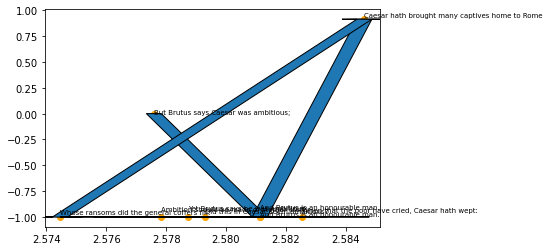

In [ ]:
plt.scatter(features[13:13+9,0], features[13:13+9,1],color="orange")

for i in np.arange(9)+13:
    plt.text(features[i,0],features[i,1]+0.01*(i-13), data[i],fontsize=7) 
for i in np.arange(8)+13:
    plt.arrow(features[i,0],features[i,1],features[i+1,0]-features[i,0],features[i+1,1]-features[i,1],width=0.0005)
plt.show()

In [ ]:
import pandas
import spacy
from spacy.tokens import Token
from gensim import corpora

nlp = spacy.load('en_core_web_sm')

from sklearn.feature_extraction.text import TfidfVectorizer

## News from New York Times in different sections

In [ ]:
txt=open('nytimes_news_articles.txt',encoding='utf-8').read()
import re

In [ ]:
len(txt)

44041131

In [ ]:
#txt=txt.replace("\n"," ")
found = re.findall('URL:(.*?)html', txt[:15041131])
category=[]

for f in found:
    category.append(f[35:].split("/")[0])

t=txt[:15041131]
for f in found:
    t=t.replace("URL:"+f+"html\n\n","<<<<<")
    
t=t.split("<<<<<")
t=t[1:-1]
category=category[:-1]



In [ ]:
len(t)==len(category)

True

In [ ]:
len(t)

2976

In [ ]:
articles=[tt.replace("\n"," ") for tt in t]

In [ ]:
#articles[0]

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
articles_sentence=[sent_tokenize(aa) for aa in articles]

In [ ]:
#np.bincount(sorted([len(aa) for aa in articles_sentence]))

In [ ]:
dt=[[*aa[:18],bb] for aa,bb in zip(articles_sentence,category) if len(aa)>18]

In [ ]:
pd.DataFrame(dt).to_csv("nyt.csv",index=False)

In [ ]:
dt=pd.DataFrame(dt)

In [ ]:
from collections import defaultdict
d = defaultdict(int)

for i in dt.iloc[:,-1]:
    d[i]+=1

In [ ]:
#d

In [ ]:
sport=dt[dt[18]=="sports"].iloc[:,:-1]
business=dt[dt[18]=="business"].iloc[:,:-1]

In [ ]:
dt_flat=[aa[:18] for aa,bb in zip(articles_sentence,category) if len(aa)>18]

In [ ]:
dt_flat=np.array(dt_flat).flatten()
len(dt_flat)

40374

In [ ]:
model=SentenceTransformer('all-MiniLM-L12-v2')
encoded_data = model.encode(dt_flat)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
sbert_ls=list(encoded_data.reshape(-1,18,384))
sbert_df=np.array([[*ss] for ss,bb in zip(sbert_ls,category)])

In [ ]:
from gtda.homology import VietorisRipsPersistence, WeightedRipsPersistence
from gtda.diagrams import PersistenceEntropy

VR = VietorisRipsPersistence(homology_dimensions=[0,1,2,3,4,5])  # Parameter explained in the text
diagrams = VR.fit_transform(sbert_df)
#diagrams = VR.fit_transform(encoded_data)
print(diagrams.shape)



PE = PersistenceEntropy()
features = PE.fit_transform(diagrams)

(2243, 40, 3)


In [ ]:
cat=[bb for aa,bb in zip(articles_sentence,category) if len(aa)>18]
len(cat)

2243

In [ ]:
set(cat)

{'arts',
 'automobiles',
 'books',
 'business',
 'dining',
 'education',
 'fashion',
 'health',
 'insider',
 'jobs',
 'magazine',
 'movies',
 'nyregion',
 'nytnow',
 'pageoneplus',
 'realestate',
 'science',
 'sports',
 'style',
 't-magazine',
 'technology',
 'theater',
 'travel',
 'universal',
 'upshot',
 'us',
 'world',
 'your-money'}

In [ ]:
import numpy.ma as ma

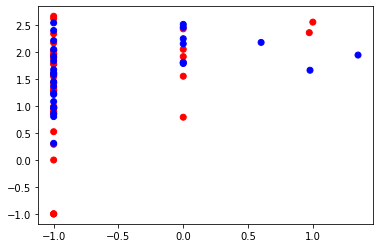

In [ ]:
coloring=[]
for cc in cat:
    if cc=="theater":
        coloring.append("blue")
    elif cc=="science":
        coloring.append("red")
    else:
        coloring.append("yellow")

        
mask_red=ma.masked_where(np.array(coloring) == "red",np.array(coloring)).mask
mask_blue=ma.masked_where(np.array(coloring) == "blue",np.array(coloring)).mask

a,b=2,1
plt.scatter(features[mask_red,a], features[mask_red,b],color=np.array(coloring)[mask_red])
plt.scatter(features[mask_blue,a], features[mask_blue,b],color=np.array(coloring)[mask_blue])
#plt.ylim(4.04, 4.1)

plt.show()

In [ ]:
sbert_df.shape

(2243, 18, 384)

In [ ]:
sbert_df.transpose([0,2,1]).shape

(2243, 384, 18)

## extraction topological data from articles

In [ ]:
#https://giotto-ai.github.io/gtda-docs/0.5.1/notebooks/gravitational_waves_detection.html official documentation referenced

from gtda.diagrams import PersistenceEntropy, Scaler
from gtda.homology import VietorisRipsPersistence
from gtda.metaestimators import CollectionTransformer
from gtda.pipeline import Pipeline
from gtda.time_series import TakensEmbedding

embedding_dimension = 12
embedding_time_delay = 1
stride = 1

embedder = TakensEmbedding(time_delay=embedding_time_delay,
                           dimension=embedding_dimension,
                           stride=stride)

batch_pca = CollectionTransformer(PCA(n_components=4), n_jobs=-1)



persistence = VietorisRipsPersistence(homology_dimensions=[0, 1], n_jobs=-1)

scaling = Scaler()

entropy = PersistenceEntropy(normalize=True, nan_fill_value=-10)


steps = [("embedder", embedder),
         ("pca", batch_pca),
         ("persistence", persistence),
         ("scaling", scaling),
         ("entropy", entropy)]
topological_transfomer = Pipeline(steps)



In [ ]:
ssbert=sbert_df.transpose([0,2,1])

In [ ]:
rfeature=[]
for ss in range(len(ssbert)):
    if ss%50==0:
        print(ss)
    rfeature.append(topological_transfomer.fit_transform(ssbert[ss]))

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200


In [ ]:
tda_article=np.array([rr.flatten() for rr in rfeature])

In [ ]:
pd.DataFrame(tda_article).to_csv("tda.csv",index=False)

In [ ]:
ssbert=ssbert.reshape(2243,-1)

In [ ]:
pd.DataFrame(ssbert).to_csv("ssbert.csv",index=False)

In [ ]:
len(cat)

2243

In [ ]:
subset_index=[]
for cc in range(len(cat)):
    if cat[cc] in ["sports","business"]:
        subset_index.append(cc)

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    tda_article[subset_index], np.array(cat)[subset_index], test_size=0.2, random_state=42
)

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_valid, y_train, y_valid)

print(models)

100%|██████████| 29/29 [00:34<00:00,  1.20s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
PassiveAggressiveClassifier        0.78               0.79    None      0.78   
Perceptron                         0.78               0.78    None      0.78   
NuSVC                              0.78               0.78    None      0.78   
LogisticRegression                 0.76               0.76    None      0.76   
SVC                                0.77               0.75    None      0.77   
AdaBoostClassifier                 0.77               0.75    None      0.77   
CalibratedClassifierCV             0.76               0.75    None      0.76   
XGBClassifier                      0.76               0.74    None      0.76   
LinearSVC                          0.74               0.74    None      0.75   
RidgeClassifierCV                  0.71               0.71    None      0.72   
RidgeClassifier                    0.71 

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score


def print_scores(fitted_model):
    res = {
        "Accuracy on train:": accuracy_score(fitted_model.predict(X_train), y_train),
        "ROC AUC on train:": roc_auc_score(
            y_train, fitted_model.predict_proba(X_train)[:, 1]
        ),
        "Accuracy on valid:": accuracy_score(fitted_model.predict(X_valid), y_valid),
        "ROC AUC on valid:": roc_auc_score(
            y_valid, fitted_model.predict_proba(X_valid)[:, 1]
        ),
    }

    for k, v in res.items():
        print(k, round(v, 3))

# Explore giotto-tda representation power

## load nyt.csv,(contains tokenized sentences from nyt articles) tda.csv(tda representation of articles,extracted from ssbert),ssbert.csv(sbert representation of articles)

In [ ]:
##cat is the last column of nyt.csv <-important

subset_index=[]
for cc in range(len(cat)):
    if cat[cc] in ["sports","business"]:
        subset_index.append(cc)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    tda_article[subset_index], np.array(cat)[subset_index], test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score


def print_scores(fitted_model):
    res = {
        "Accuracy on train:": accuracy_score(fitted_model.predict(X_train), y_train),
        "ROC AUC on train:": roc_auc_score(
            y_train, fitted_model.predict_proba(X_train)[:, 1]
        ),
        "f1 score on train:": f1_score(y_train, fitted_model.predict(X_train), average = 'micro'),
        "Accuracy on valid:": accuracy_score(fitted_model.predict(X_valid), y_valid),
        "ROC AUC on valid:": roc_auc_score(
            y_valid, fitted_model.predict_proba(X_valid)[:, 1]
        ),
        "f1 score on valid:": f1_score(y_valid, fitted_model.predict(X_valid), average = 'micro')
    }

    for k, v in res.items():
        print(k, round(v, 3))

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
def cal_scores(fitted_model):
  train_acc = accuracy_score(fitted_model.predict(X_train), y_train)
  train_auc = roc_auc_score(y_train, fitted_model.predict_proba(X_train)[:, 1])
  train_f1 = f1_score(y_train, fitted_model.predict(X_train), average = 'micro')
  valid_acc = accuracy_score(fitted_model.predict(X_valid), y_valid)
  valid_auc = roc_auc_score(y_valid, fitted_model.predict_proba(X_valid)[:, 1])
  valid_f1 = f1_score(y_valid, fitted_model.predict(X_valid), average = 'micro')
  return train_acc, train_auc, train_f1, valid_acc, valid_auc, valid_f1

In [ ]:
from sklearn.linear_model import LogisticRegression
#binary classification between sports and business
#random will yield accuracy of 375/(375+269)=0.5822981366459627 and ROC AUC of 0.5
c_array = np.logspace(np.log(0.05), np.log(1), num=50, endpoint=True)
train_accuracy = [] 
train_auc_score = []
train_f1_score = [] 
valid_accuracy = []
valid_auc_score = []
valid_f1_score = []
for c_var in c_array:
  model = LogisticRegression(solver = 'saga', penalty = 'l1', C=c_var, max_iter = 300) 
#to do: play with different inverse-regularization values C, aggressive C (small values) yield better results
#make a table out of this
  model.fit(X_train, y_train)
  t1, t2, t3, v1, v2, v3 = cal_scores(model)
  train_accuracy.append(t1)
  train_auc_score.append(t2)
  train_f1_score.append(t3)
  valid_accuracy.append(v1)
  valid_auc_score.append(v2)
  valid_f1_score.append(v3)
#to conclude because ROC >0.5 as we decrease C from 0.01, tda was able to yield a meaningful representation
#0.56 on ROC valid is not bad! "will push the needle further or something"

0.9 0.373


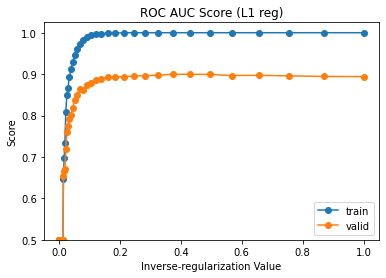

In [ ]:
plt.plot(c_array, train_auc_score, "o-", label = "train")
plt.plot(c_array, valid_auc_score, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.5)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("ROC AUC Score (L1 reg)")
print(round(max(valid_auc_score), 3), round(c_array[np.argmax(valid_auc_score)], 3))

0.86 0.121


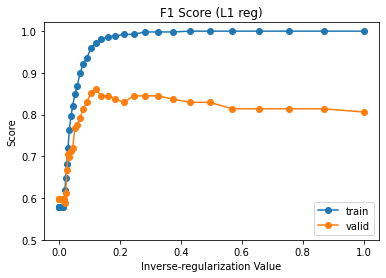

In [ ]:
plt.plot(c_array, train_f1_score, "o-", label = "train")
plt.plot(c_array, valid_f1_score, "o-", label = "valid")
#plt.ylim(top = 0.6)
plt.ylim(bottom = 0.5)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("F1 Score (L1 reg)")
print(round(max(valid_f1_score), 3), round(c_array[np.argmax(valid_f1_score)], 3))

0.86 0.121


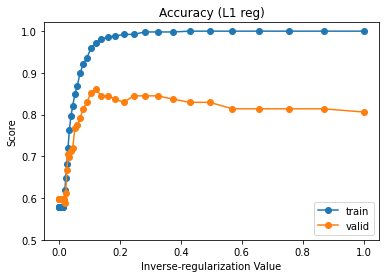

In [ ]:
plt.plot(c_array, train_accuracy, "o-", label = "train")
plt.plot(c_array, valid_accuracy, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.5)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("Accuracy (L1 reg)")
print(round(max(valid_accuracy), 3), round(c_array[np.argmax(valid_accuracy)], 3))

In [ ]:
from sklearn.linear_model import LogisticRegression
#binary classification between sports and business
#random will yield accuracy of 375/(375+269)=0.5822981366459627 and ROC AUC of 0.5
c_array = np.logspace(np.log(0.05), np.log(0.5), num=50, endpoint=True)
train_accuracy = [] 
train_auc_score = []
train_f1_score = [] 
valid_accuracy = []
valid_auc_score = []
valid_f1_score = []
for c_var in c_array:
  model = LogisticRegression(solver = 'saga', penalty = 'l2', C=c_var,max_iter = 300) 
#to do: play with different inverse-regularization values C, aggressive C (small values) yield better results
#make a table out of this
  model.fit(X_train, y_train)
  t1, t2, t3, v1, v2, v3 = cal_scores(model)
  train_accuracy.append(t1)
  train_auc_score.append(t2)
  train_f1_score.append(t3)
  valid_accuracy.append(v1)
  valid_auc_score.append(v2)
  valid_f1_score.append(v3)
#to conclude because ROC >0.5 as we decrease C from 0.01, tda was able to yield a meaningful representation
#0.56 on ROC valid is not bad! "will push the needle further or something"

In [ ]:
print(model.coef_, model.intercept_)

[[ 9.35217057e-02  6.78034871e-02 -6.76373013e-03  2.35026362e-02
  -5.86010238e-02 -2.58613159e-02 -1.22408079e-01  2.87150609e-02
  -7.82972792e-02 -3.42888583e-02 -9.00654788e-02 -9.94694396e-02
  -1.45547497e-01 -1.22901882e-01 -3.87453139e-02 -7.91209242e-02
  -7.54206171e-03  5.22680403e-02  6.07209533e-02  4.90767394e-02
  -8.35296895e-02  5.57754200e-02 -6.80734201e-03 -1.22753552e-02
  -8.30785070e-02  5.83566983e-02 -1.41764164e-01 -1.95447599e-02
  -6.19698937e-02  8.08366684e-02 -4.68465473e-02 -3.29238142e-03
  -2.81709763e-03  2.39217997e-02  8.46677026e-02 -8.93511895e-02
   6.36955284e-02  6.67933189e-02  1.09578420e-01  6.46371855e-02
  -2.97080284e-02  6.00318765e-02  2.86863004e-03  2.69673934e-02
  -1.57293764e-02 -5.97595087e-03 -8.15181348e-02  4.59187669e-02
  -1.35157930e-01  5.22406119e-02 -4.00222109e-02  6.29117760e-02
  -3.71441396e-02 -6.92989975e-02 -9.21894726e-02  2.21183125e-02
  -3.74056573e-02 -5.00455822e-02 -2.19784340e-02  2.08233331e-02
  -4.02520

0.887 0.062


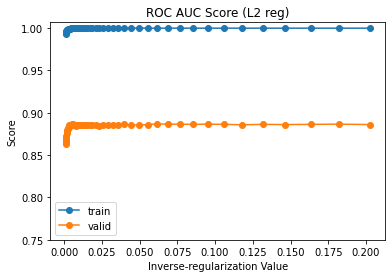

In [ ]:
plt.plot(c_array, train_auc_score, "o-", label = "train")
plt.plot(c_array, valid_auc_score, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.75)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("ROC AUC Score (L2 reg)")
print(round(max(valid_auc_score), 3), round(c_array[np.argmax(valid_auc_score)], 3))

0.853 0.003


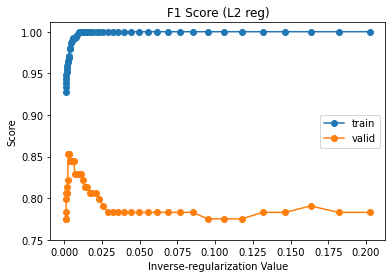

In [ ]:
plt.plot(c_array, train_f1_score, "o-", label = "train")
plt.plot(c_array, valid_f1_score, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.75)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("F1 Score (L2 reg)")
print(round(max(valid_f1_score), 3), round(c_array[np.argmax(valid_f1_score)], 3))

0.853 0.003


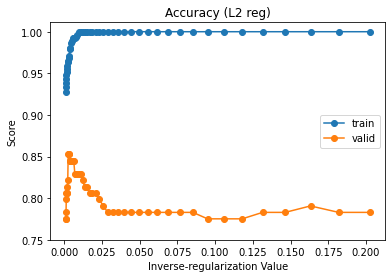

In [ ]:
plt.plot(c_array, train_accuracy, "o-", label = "train")
plt.plot(c_array, valid_accuracy, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.75)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("Accuracy (L2 reg)")
print(round(max(valid_accuracy), 3), round(c_array[np.argmax(valid_accuracy)], 3))

In [ ]:
#to do further: run simple algorithms (logistic regression,cosine similarity, or single layer classifer for the same task above) 
#try single layer? just because deep learning? we are using sbert(transformer) anyways and since
#this paper focuses on representation learning power of tda anyways
#compare results for ssbert.csv's representation vs tda.csv's representation vs both representations combined
#ie: dimensionality reduction to 100 features for both ssbert and tda vs each other,
#and 200 features for tda+ssbert vs a dimensionality reduction to 200 from ssbert alone
from sklearn.neural_network import MLPClassifier
hidden_array = np.arange(1,26,1)
train_accuracy = [] 
train_auc_score = []
train_f1_score = [] 
valid_accuracy = []
valid_auc_score = []
valid_f1_score = []
for h_var in hidden_array:
  model = MLPClassifier(hidden_layer_sizes = (h_var)) 
#to do: play with different inverse-regularization values C, aggressive C (small values) yield better results
#make a table out of this
  model.fit(X_train, y_train)
  t1, t2, t3, v1, v2, v3 = cal_scores(model)
  train_accuracy.append(t1)
  train_auc_score.append(t2)
  train_f1_score.append(t3)
  valid_accuracy.append(v1)
  valid_auc_score.append(v2)
  valid_f1_score.append(v3)

0.893 21


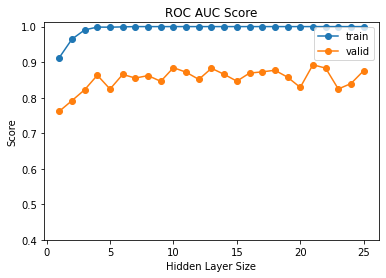

In [ ]:
plt.plot(hidden_array, train_auc_score, "o-", label = "train")
plt.plot(hidden_array, valid_auc_score, "o-", label = "valid")
#plt.ylim(top = 1.05)
plt.ylim(bottom = 0.4)
plt.xlabel("Hidden Layer Size")
plt.ylabel("Score")
plt.legend()
plt.title("ROC AUC Score")
print(round(max(valid_auc_score), 3), round(hidden_array[np.argmax(valid_auc_score)], 3))

0.86 21


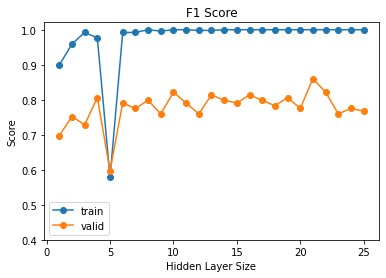

In [ ]:
plt.plot(hidden_array, train_f1_score, "o-", label = "train")
plt.plot(hidden_array, valid_f1_score, "o-", label = "valid")
#plt.ylim(top = 1.05)
plt.ylim(bottom = 0.4)
plt.xlabel("Hidden Layer Size")
plt.ylabel("Score")
plt.legend()
plt.title("F1 Score")
print(round(max(valid_f1_score), 3), round(hidden_array[np.argmax(valid_f1_score)], 3))

0.86 21


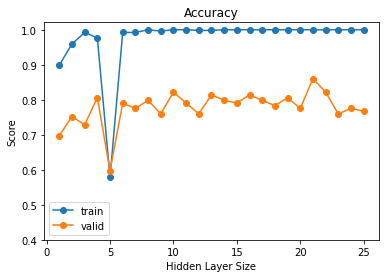

In [ ]:
plt.plot(hidden_array, train_accuracy, "o-", label = "train")
plt.plot(hidden_array, valid_accuracy, "o-", label = "valid")
#plt.ylim(top = 1.05)
plt.ylim(bottom = 0.4)
plt.xlabel("Hidden Layer Size")
plt.ylabel("Score")
plt.legend()
plt.title("Accuracy")
print(round(max(valid_accuracy), 3), round(hidden_array[np.argmax(valid_accuracy)], 3))

Comparison: ssbert

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    ssbert[subset_index], np.array(cat)[subset_index], test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score


def print_scores(fitted_model):
    res = {
        "Accuracy on train:": accuracy_score(fitted_model.predict(X_train), y_train),
        "ROC AUC on train:": roc_auc_score(
            y_train, fitted_model.predict_proba(X_train)[:, 1]
        ),
        "f1 score on train:": f1_score(y_train, fitted_model.predict(X_train), average = 'micro'),
        "Accuracy on valid:": accuracy_score(fitted_model.predict(X_valid), y_valid),
        "ROC AUC on valid:": roc_auc_score(
            y_valid, fitted_model.predict_proba(X_valid)[:, 1]
        ),
        "f1 score on valid:": f1_score(y_valid, fitted_model.predict(X_valid), average = 'micro')
    }

    for k, v in res.items():
        print(k, round(v, 3))

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
def cal_scores(fitted_model):
  train_acc = accuracy_score(fitted_model.predict(X_train), y_train)
  train_auc = roc_auc_score(y_train, fitted_model.predict_proba(X_train)[:, 1])
  train_f1 = f1_score(y_train, fitted_model.predict(X_train), average = 'micro')
  valid_acc = accuracy_score(fitted_model.predict(X_valid), y_valid)
  valid_auc = roc_auc_score(y_valid, fitted_model.predict_proba(X_valid)[:, 1])
  valid_f1 = f1_score(y_valid, fitted_model.predict(X_valid), average = 'micro')
  return train_acc, train_auc, train_f1, valid_acc, valid_auc, valid_f1

In [ ]:
from sklearn.linear_model import LogisticRegression
#binary classification between sports and business
#random will yield accuracy of 375/(375+269)=0.5822981366459627 and ROC AUC of 0.5
c_array = np.logspace(np.log(0.05), np.log(1), num=50, endpoint=True)
train_accuracy = [] 
train_auc_score = []
train_f1_score = [] 
valid_accuracy = []
valid_auc_score = []
valid_f1_score = []
for c_var in c_array:
  model = LogisticRegression(solver = 'saga', penalty = 'l1', C=c_var, max_iter = 300) 
#to do: play with different inverse-regularization values C, aggressive C (small values) yield better results
#make a table out of this
  model.fit(X_train, y_train)
  t1, t2, t3, v1, v2, v3 = cal_scores(model)
  train_accuracy.append(t1)
  train_auc_score.append(t2)
  train_f1_score.append(t3)
  valid_accuracy.append(v1)
  valid_auc_score.append(v2)
  valid_f1_score.append(v3)
#to conclude because ROC >0.5 as we decrease C from 0.01, tda was able to yield a meaningful representation
#0.56 on ROC valid is not bad! "will push the needle further or something"

0.999 0.121


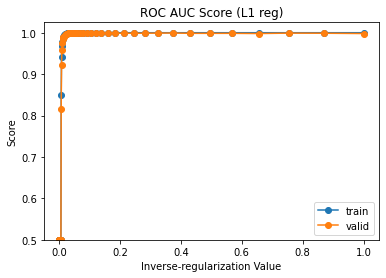

In [ ]:
plt.plot(c_array, train_auc_score, "o-", label = "train")
plt.plot(c_array, valid_auc_score, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.5)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("ROC AUC Score (L1 reg)")
print(round(max(valid_auc_score), 3), round(c_array[np.argmax(valid_auc_score)], 3))

0.984 0.105


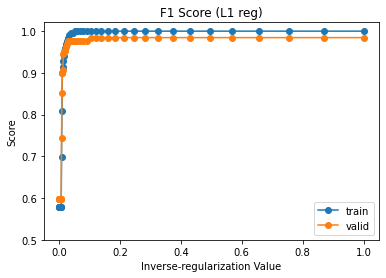

In [ ]:
plt.plot(c_array, train_f1_score, "o-", label = "train")
plt.plot(c_array, valid_f1_score, "o-", label = "valid")
#plt.ylim(top = 0.6)
plt.ylim(bottom = 0.5)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("F1 Score (L1 reg)")
print(round(max(valid_f1_score), 3), round(c_array[np.argmax(valid_f1_score)], 3))

0.984 0.105


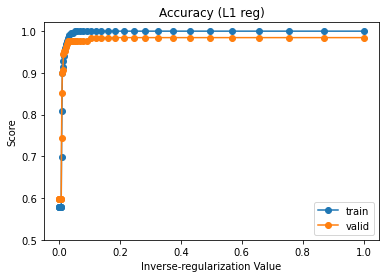

In [ ]:
plt.plot(c_array, train_accuracy, "o-", label = "train")
plt.plot(c_array, valid_accuracy, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.5)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("Accuracy (L1 reg)")
print(round(max(valid_accuracy), 3), round(c_array[np.argmax(valid_accuracy)], 3))

In [ ]:
from sklearn.linear_model import LogisticRegression
#binary classification between sports and business
#random will yield accuracy of 375/(375+269)=0.5822981366459627 and ROC AUC of 0.5
c_array = np.logspace(np.log(0.05), np.log(0.5), num=50, endpoint=True)
train_accuracy = [] 
train_auc_score = []
train_f1_score = [] 
valid_accuracy = []
valid_auc_score = []
valid_f1_score = []
for c_var in c_array:
  model = LogisticRegression(solver = 'saga', penalty = 'l2', C=c_var,max_iter = 300) 
#to do: play with different inverse-regularization values C, aggressive C (small values) yield better results
#make a table out of this
  model.fit(X_train, y_train)
  t1, t2, t3, v1, v2, v3 = cal_scores(model)
  train_accuracy.append(t1)
  train_auc_score.append(t2)
  train_f1_score.append(t3)
  valid_accuracy.append(v1)
  valid_auc_score.append(v2)
  valid_f1_score.append(v3)
#to conclude because ROC >0.5 as we decrease C from 0.01, tda was able to yield a meaningful representation
#0.56 on ROC valid is not bad! "will push the needle further or something"

0.999 0.001


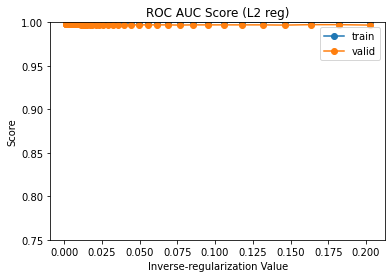

In [ ]:
plt.plot(c_array, train_auc_score, "o-", label = "train")
plt.plot(c_array, valid_auc_score, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.75)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("ROC AUC Score (L2 reg)")
print(round(max(valid_auc_score), 3), round(c_array[np.argmax(valid_auc_score)], 3))

0.977 0.002


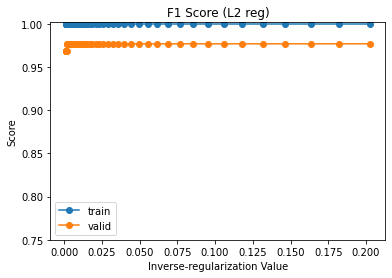

In [ ]:
plt.plot(c_array, train_f1_score, "o-", label = "train")
plt.plot(c_array, valid_f1_score, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.75)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("F1 Score (L2 reg)")
print(round(max(valid_f1_score), 3), round(c_array[np.argmax(valid_f1_score)], 3))

0.977 0.002


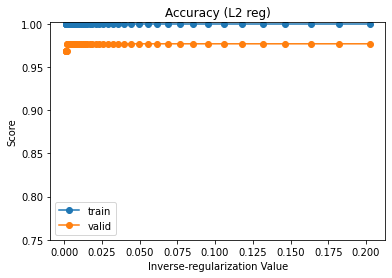

In [ ]:
plt.plot(c_array, train_accuracy, "o-", label = "train")
plt.plot(c_array, valid_accuracy, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.75)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("Accuracy (L2 reg)")
print(round(max(valid_accuracy), 3), round(c_array[np.argmax(valid_accuracy)], 3))

In [ ]:
#to do further: run simple algorithms (logistic regression,cosine similarity, or single layer classifer for the same task above) 
#try single layer? just because deep learning? we are using sbert(transformer) anyways and since
#this paper focuses on representation learning power of tda anyways
#compare results for ssbert.csv's representation vs tda.csv's representation vs both representations combined
#ie: dimensionality reduction to 100 features for both ssbert and tda vs each other,
#and 200 features for tda+ssbert vs a dimensionality reduction to 200 from ssbert alone
from sklearn.neural_network import MLPClassifier
hidden_array = np.arange(1,26,1)
train_accuracy = [] 
train_auc_score = []
train_f1_score = [] 
valid_accuracy = []
valid_auc_score = []
valid_f1_score = []
for h_var in hidden_array:
  model = MLPClassifier(hidden_layer_sizes = (h_var)) 
#to do: play with different inverse-regularization values C, aggressive C (small values) yield better results
#make a table out of this
  model.fit(X_train, y_train)
  t1, t2, t3, v1, v2, v3 = cal_scores(model)
  train_accuracy.append(t1)
  train_auc_score.append(t2)
  train_f1_score.append(t3)
  valid_accuracy.append(v1)
  valid_auc_score.append(v2)
  valid_f1_score.append(v3)

1.0 10


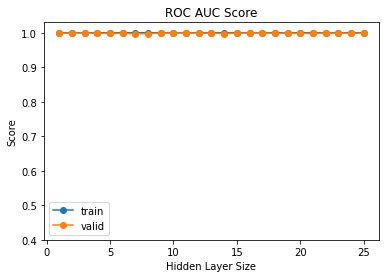

In [ ]:
plt.plot(hidden_array, train_auc_score, "o-", label = "train")
plt.plot(hidden_array, valid_auc_score, "o-", label = "valid")
plt.ylim(top = 1.03)
plt.ylim(bottom = 0.4)
plt.xlabel("Hidden Layer Size")
plt.ylabel("Score")
plt.legend()
plt.title("ROC AUC Score")
print(round(max(valid_auc_score), 3), round(hidden_array[np.argmax(valid_auc_score)], 3))

0.977 4


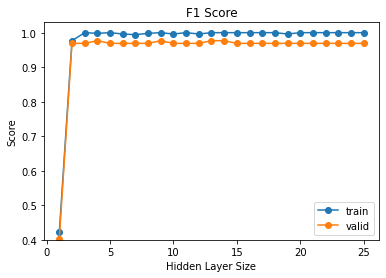

In [ ]:
plt.plot(hidden_array, train_f1_score, "o-", label = "train")
plt.plot(hidden_array, valid_f1_score, "o-", label = "valid")
#plt.ylim(top = 1.05)
plt.ylim(bottom = 0.4)
plt.xlabel("Hidden Layer Size")
plt.ylabel("Score")
plt.legend()
plt.title("F1 Score")
print(round(max(valid_f1_score), 3), round(hidden_array[np.argmax(valid_f1_score)], 3))

0.977 4


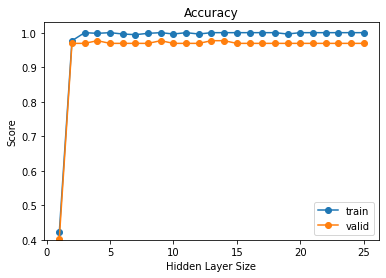

In [ ]:
plt.plot(hidden_array, train_accuracy, "o-", label = "train")
plt.plot(hidden_array, valid_accuracy, "o-", label = "valid")
#plt.ylim(top = 1.05)
plt.ylim(bottom = 0.4)
plt.xlabel("Hidden Layer Size")
plt.ylabel("Score")
plt.legend()
plt.title("Accuracy")
print(round(max(valid_accuracy), 3), round(hidden_array[np.argmax(valid_accuracy)], 3))

**tda-sbert**

In [ ]:
from sklearn.model_selection import train_test_split
merged = np.concatenate((ssbert, tda_article), axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(merged[subset_index], np.array(cat)[subset_index], test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score


def print_scores(fitted_model):
    res = {
        "Accuracy on train:": accuracy_score(fitted_model.predict(X_train), y_train),
        "ROC AUC on train:": roc_auc_score(
            y_train, fitted_model.predict_proba(X_train)[:, 1]
        ),
        "f1 score on train:": f1_score(y_train, fitted_model.predict(X_train), average = 'micro'),
        "Accuracy on valid:": accuracy_score(fitted_model.predict(X_valid), y_valid),
        "ROC AUC on valid:": roc_auc_score(
            y_valid, fitted_model.predict_proba(X_valid)[:, 1]
        ),
        "f1 score on valid:": f1_score(y_valid, fitted_model.predict(X_valid), average = 'micro')
    }

    for k, v in res.items():
        print(k, round(v, 3))

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
def cal_scores(fitted_model):
  train_acc = accuracy_score(fitted_model.predict(X_train), y_train)
  train_auc = roc_auc_score(y_train, fitted_model.predict_proba(X_train)[:, 1])
  train_f1 = f1_score(y_train, fitted_model.predict(X_train), average = 'micro')
  valid_acc = accuracy_score(fitted_model.predict(X_valid), y_valid)
  valid_auc = roc_auc_score(y_valid, fitted_model.predict_proba(X_valid)[:, 1])
  valid_f1 = f1_score(y_valid, fitted_model.predict(X_valid), average = 'micro')
  return train_acc, train_auc, train_f1, valid_acc, valid_auc, valid_f1

In [ ]:
from sklearn.linear_model import LogisticRegression
#binary classification between sports and business
#random will yield accuracy of 375/(375+269)=0.5822981366459627 and ROC AUC of 0.5
c_array = np.logspace(np.log(0.05), np.log(1), num=50, endpoint=True)
train_accuracy = [] 
train_auc_score = []
train_f1_score = [] 
valid_accuracy = []
valid_auc_score = []
valid_f1_score = []
for c_var in c_array:
  model = LogisticRegression(solver = 'saga', penalty = 'l1', C=c_var, max_iter = 300) 
#to do: play with different inverse-regularization values C, aggressive C (small values) yield better results
#make a table out of this
  model.fit(X_train, y_train)
  t1, t2, t3, v1, v2, v3 = cal_scores(model)
  train_accuracy.append(t1)
  train_auc_score.append(t2)
  train_f1_score.append(t3)
  valid_accuracy.append(v1)
  valid_auc_score.append(v2)
  valid_f1_score.append(v3)
#to conclude because ROC >0.5 as we decrease C from 0.01, tda was able to yield a meaningful representation
#0.56 on ROC valid is not bad! "will push the needle further or something"

0.999 0.034


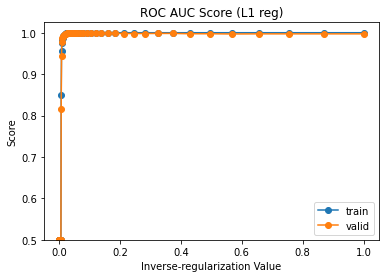

In [ ]:
plt.plot(c_array, train_auc_score, "o-", label = "train")
plt.plot(c_array, valid_auc_score, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.5)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("ROC AUC Score (L1 reg)")
print(round(max(valid_auc_score), 3), round(c_array[np.argmax(valid_auc_score)], 3))

0.984 0.019


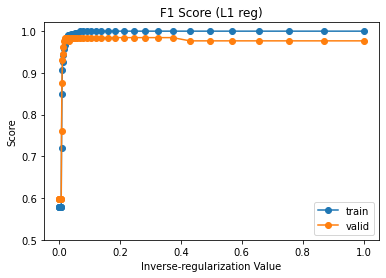

In [ ]:
plt.plot(c_array, train_f1_score, "o-", label = "train")
plt.plot(c_array, valid_f1_score, "o-", label = "valid")
#plt.ylim(top = 0.6)
plt.ylim(bottom = 0.5)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("F1 Score (L1 reg)")
print(round(max(valid_f1_score), 3), round(c_array[np.argmax(valid_f1_score)], 3))

0.984 0.019


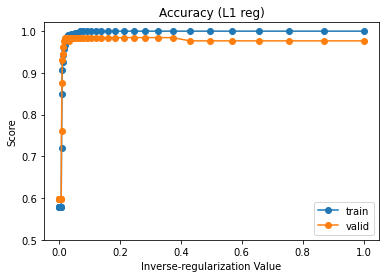

In [ ]:
plt.plot(c_array, train_accuracy, "o-", label = "train")
plt.plot(c_array, valid_accuracy, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.5)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("Accuracy (L1 reg)")
print(round(max(valid_accuracy), 3), round(c_array[np.argmax(valid_accuracy)], 3))

In [ ]:
from sklearn.linear_model import LogisticRegression
#binary classification between sports and business
#random will yield accuracy of 375/(375+269)=0.5822981366459627 and ROC AUC of 0.5
c_array = np.logspace(np.log(0.05), np.log(0.5), num=50, endpoint=True)
train_accuracy = [] 
train_auc_score = []
train_f1_score = [] 
valid_accuracy = []
valid_auc_score = []
valid_f1_score = []
for c_var in c_array:
  model = LogisticRegression(solver = 'saga', penalty = 'l2', C=c_var,max_iter = 300) 
#to do: play with different inverse-regularization values C, aggressive C (small values) yield better results
#make a table out of this
  model.fit(X_train, y_train)
  t1, t2, t3, v1, v2, v3 = cal_scores(model)
  train_accuracy.append(t1)
  train_auc_score.append(t2)
  train_f1_score.append(t3)
  valid_accuracy.append(v1)
  valid_auc_score.append(v2)
  valid_f1_score.append(v3)
#to conclude because ROC >0.5 as we decrease C from 0.01, tda was able to yield a meaningful representation
#0.56 on ROC valid is not bad! "will push the needle further or something"

0.999 0.001


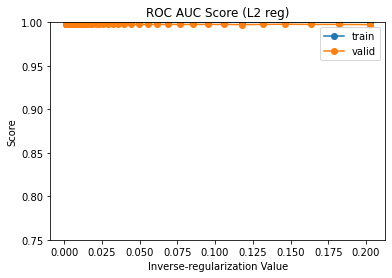

In [ ]:
plt.plot(c_array, train_auc_score, "o-", label = "train")
plt.plot(c_array, valid_auc_score, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.75)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("ROC AUC Score (L2 reg)")
print(round(max(valid_auc_score), 3), round(c_array[np.argmax(valid_auc_score)], 3))

0.977 0.069


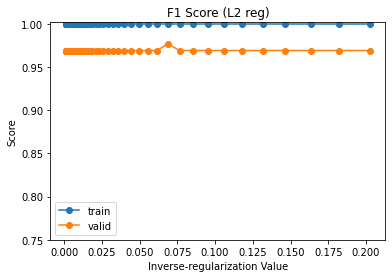

In [ ]:
plt.plot(c_array, train_f1_score, "o-", label = "train")
plt.plot(c_array, valid_f1_score, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.75)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("F1 Score (L2 reg)")
print(round(max(valid_f1_score), 3), round(c_array[np.argmax(valid_f1_score)], 3))

0.977 0.069


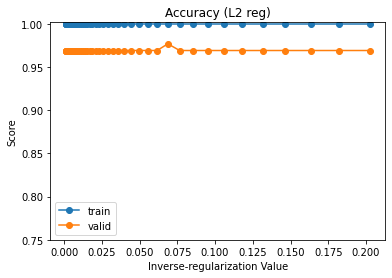

In [ ]:
plt.plot(c_array, train_accuracy, "o-", label = "train")
plt.plot(c_array, valid_accuracy, "o-", label = "valid")
#plt.ylim(top = 0.8)
plt.ylim(bottom = 0.75)
plt.xlabel("Inverse-regularization Value")
plt.ylabel("Score")
plt.legend()
plt.title("Accuracy (L2 reg)")
print(round(max(valid_accuracy), 3), round(c_array[np.argmax(valid_accuracy)], 3))

In [ ]:
#to do further: run simple algorithms (logistic regression,cosine similarity, or single layer classifer for the same task above) 
#try single layer? just because deep learning? we are using sbert(transformer) anyways and since
#this paper focuses on representation learning power of tda anyways
#compare results for ssbert.csv's representation vs tda.csv's representation vs both representations combined
#ie: dimensionality reduction to 100 features for both ssbert and tda vs each other,
#and 200 features for tda+ssbert vs a dimensionality reduction to 200 from ssbert alone
from sklearn.neural_network import MLPClassifier
hidden_array = np.arange(1,26,1)
train_accuracy = [] 
train_auc_score = []
train_f1_score = [] 
valid_accuracy = []
valid_auc_score = []
valid_f1_score = []
for h_var in hidden_array:
  model = MLPClassifier(hidden_layer_sizes = (h_var)) 
#to do: play with different inverse-regularization values C, aggressive C (small values) yield better results
#make a table out of this
  model.fit(X_train, y_train)
  t1, t2, t3, v1, v2, v3 = cal_scores(model)
  train_accuracy.append(t1)
  train_auc_score.append(t2)
  train_f1_score.append(t3)
  valid_accuracy.append(v1)
  valid_auc_score.append(v2)
  valid_f1_score.append(v3)

1.0 17


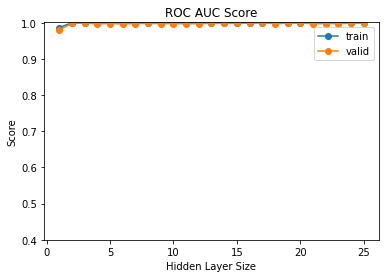

In [ ]:
plt.plot(hidden_array, train_auc_score, "o-", label = "train")
plt.plot(hidden_array, valid_auc_score, "o-", label = "valid")
#plt.ylim(top = 1.05)
plt.ylim(bottom = 0.4)
plt.xlabel("Hidden Layer Size")
plt.ylabel("Score")
plt.legend()
plt.title("ROC AUC Score")
print(round(max(valid_auc_score), 3), round(hidden_array[np.argmax(valid_auc_score)], 3))

0.977 25


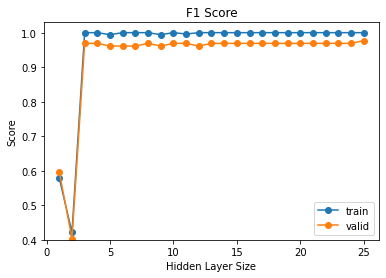

In [ ]:
plt.plot(hidden_array, train_f1_score, "o-", label = "train")
plt.plot(hidden_array, valid_f1_score, "o-", label = "valid")
#plt.ylim(top = 1.05)
plt.ylim(bottom = 0.4)
plt.xlabel("Hidden Layer Size")
plt.ylabel("Score")
plt.legend()
plt.title("F1 Score")
print(round(max(valid_f1_score), 3), round(hidden_array[np.argmax(valid_f1_score)], 3))

0.977 25


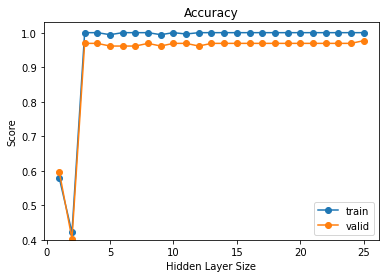

In [ ]:
plt.plot(hidden_array, train_accuracy, "o-", label = "train")
plt.plot(hidden_array, valid_accuracy, "o-", label = "valid")
#plt.ylim(top = 1.05)
plt.ylim(bottom = 0.4)
plt.xlabel("Hidden Layer Size")
plt.ylabel("Score")
plt.legend()
plt.title("Accuracy")
print(round(max(valid_accuracy), 3), round(hidden_array[np.argmax(valid_accuracy)], 3))

In [ ]:
Dimentionality reduction

In [ ]:
from sklearn.decomposition import PCA
X_train, X_valid, y_train, y_valid = train_test_split(ssbert[subset_index], np.array(cat)[subset_index], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_valid = pca.transform(X_valid)
pca_model = LogisticRegression(solver = 'saga', penalty = 'l2', C=0.001, max_iter = 300)
pca_model.fit(X_train, y_train)
print_scores(pca_model)

Accuracy on train: 0.977
ROC AUC on train: 0.999
f1 score on train: 0.977
Accuracy on valid: 0.977
ROC AUC on valid: 0.998
f1 score on valid: 0.977


In [ ]:
from sklearn.decomposition import PCA
X_train, X_valid, y_train, y_valid = train_test_split(tda_article[subset_index], np.array(cat)[subset_index], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_valid = pca.transform(X_valid)
pca_model = LogisticRegression(solver = 'saga', penalty = 'l2', C=0.003, max_iter = 300)
pca_model.fit(X_train, y_train)
print_scores(pca_model)

Accuracy on train: 0.751
ROC AUC on train: 0.838
f1 score on train: 0.751
Accuracy on valid: 0.698
ROC AUC on valid: 0.756
f1 score on valid: 0.698


In [ ]:
from sklearn.decomposition import PCA
merged = np.concatenate((ssbert, tda_article), axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(merged[subset_index], np.array(cat)[subset_index], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_valid = pca.transform(X_valid)
pca_model = LogisticRegression(solver = 'saga', penalty = 'l2', C=0.003, max_iter = 300)
pca_model.fit(X_train, y_train)
print_scores(pca_model)

Accuracy on train: 0.979
ROC AUC on train: 0.999
f1 score on train: 0.979
Accuracy on valid: 0.969
ROC AUC on valid: 0.997
f1 score on valid: 0.969


In [ ]:
from sklearn.decomposition import PCA
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(ssbert[subset_index], np.array(cat)[subset_index], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_valid1 = scaler.transform(X_valid1)
pca = PCA(n_components=5)
X_train1 = pca.fit_transform(X_train1)
X_valid1 = pca.transform(X_valid1)
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(tda_article[subset_index], np.array(cat)[subset_index], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_valid2 = scaler.transform(X_valid2)
pca = PCA(n_components=10)
X_train2 = pca.fit_transform(X_train2)
X_valid2 = pca.transform(X_valid2)


X_train = np.concatenate((X_train1, X_train2), axis=1)
X_valid = np.concatenate((X_valid1, X_valid2), axis=1)
Y_train = np.concatenate((y_train1, y_train2))
Y_valid = np.concatenate((y_valid1, y_valid2))

pca_model = LogisticRegression(solver = 'saga', penalty = 'l2', C=0.003, max_iter = 300)
pca_model.fit(X_train, y_train)
print_scores(pca_model)

Accuracy on train: 0.977
ROC AUC on train: 0.999
f1 score on train: 0.977
Accuracy on valid: 0.969
ROC AUC on valid: 0.997
f1 score on valid: 0.969
